<a href="https://colab.research.google.com/github/ADv0rnik/Data-analysis-for-JER/blob/main/Activity'n'climate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib as mpl
import numpy as np
from matplotlib import pyplot as plt
% matplotlib inline
import seaborn as sns
from scipy.stats import pearsonr
import datetime

In [2]:
import plotly.graph_objs as go

In [3]:
path ='/content/drive/MyDrive/Colab Notebooks/Data for JER/Temp_time_series2014-2018.csv'
df = pd.read_csv(path,parse_dates=['Date'])
df.dropna(inplace=True)
df.tail(30)

,Date,Conc,Temp
562,2018-11-28,11,-6.6
563,2018-11-29,14,-8.9
564,2018-11-30,13,-11.9
565,2018-12-01,29,-7.0
566,2018-12-02,28,-5.0
567,2018-12-03,8,0.4
568,2018-12-04,7,0.7
569,2018-12-05,9,0.4
570,2018-12-06,7,-0.3
571,2018-12-07,11,-4.0


In [4]:
df['Index'] = range(1, len(df)+1)
df

,Date,Conc,Temp,Index
0,2014-01-01,16,-3.5,1
1,2014-01-02,15,-0.9,2
2,2014-01-03,22,0.5,3
3,2014-01-04,15,0.6,4
4,2014-01-05,22,0.6,5
...,...,...,...,...
587,2018-12-25,3,-5.9,588
588,2018-12-26,6,-2.1,589
589,2018-12-27,6,-1.1,590
590,2018-12-28,6,-0.9,591


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 592 entries, 0 to 591
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    592 non-null    datetime64[ns]
 1   Conc    592 non-null    int64         
 2   Temp    592 non-null    float64       
 3   Index   592 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 23.1 KB


In [6]:
np.isinf(df['Conc']).any()
np.isnan(df['Conc']).any()

False

In [7]:
np.isfinite(df['Temp']).all()

True

In [8]:
#df.replace(-np.inf, np.nan)
with pd.option_context('mode.use_inf_as_null', True):
   df = df.dropna()
df   

,Date,Conc,Temp,Index
0,2014-01-01,16,-3.5,1
1,2014-01-02,15,-0.9,2
2,2014-01-03,22,0.5,3
3,2014-01-04,15,0.6,4
4,2014-01-05,22,0.6,5
...,...,...,...,...
587,2018-12-25,3,-5.9,588
588,2018-12-26,6,-2.1,589
589,2018-12-27,6,-1.1,590
590,2018-12-28,6,-0.9,591


In [30]:
df.head(50)

,Date,Conc,Temp,Index
0,2014-01-01,16,-3.5,1
1,2014-01-02,15,-0.9,2
2,2014-01-03,22,0.5,3
3,2014-01-04,15,0.6,4
4,2014-01-05,22,0.6,5
5,2014-01-06,8,4.1,6
6,2014-01-07,13,3.1,7
7,2014-01-08,9,3.5,8
8,2014-01-09,5,5.4,9
9,2014-01-10,6,4.4,10


In [9]:
df[df['Temp'] == 'NaN']

,Date,Conc,Temp,Index


In [10]:
np.isfinite(df['Temp']).all()

True

In [11]:
np.isnan(df['Temp']).any()

False

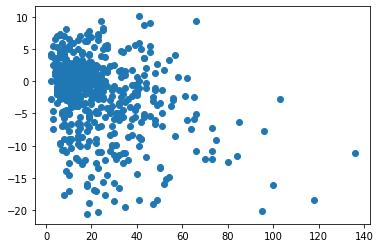

In [12]:
x = df['Conc']
y = df['Temp']
plt.scatter(x,y)

In [13]:
corr = x.corr(y)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.317


In [14]:
path1 = '/content/drive/MyDrive/Colab Notebooks/Data for JER/Temp_time_series2014-2016_1.csv'
df1 = pd.read_csv(path1, parse_dates=['Date'])
df1
ox = df1['Conc']
oy = df1['Temp']

In [17]:
df1['Index'] = range(1, len(df1)+1)
df1

,Date,Conc,Temp,Index
0,2014-12-01,136,-8.5,1
1,2014-12-02,34,-9.6,2
2,2014-12-03,38,-8.7,3
3,2014-12-04,36,-8.5,4
4,2014-12-05,46,-5.4,5
...,...,...,...,...
175,2016-02-24,6,-0.3,176
176,2016-02-25,11,-0.5,177
177,2016-02-26,9,-0.9,178
178,2016-02-27,14,-1.4,179


In [18]:
mask = (df1['Date'] >= '2015-12-1') & (df1['Date'] <= '2015-12-31')
df1.loc[mask]

,Date,Conc,Temp,Index
90,2015-12-01,9,1.8,91
91,2015-12-02,8,2.1,92
92,2015-12-03,7,1.2,93
93,2015-12-04,13,0.8,94
94,2015-12-05,21,5.7,95
95,2015-12-06,15,7.2,96
96,2015-12-07,18,8.1,97
97,2015-12-08,19,3.7,98
98,2015-12-09,12,-2.1,99
99,2015-12-10,18,-0.1,100


In [19]:
df1.loc[118:120]

,Date,Conc,Temp,Index
118,2015-12-29,11,-7.8,119
119,2015-12-30,7,-9.4,120
120,2015-12-31,11,-9.0,121


In [20]:
df1.query('Conc > 80')

,Date,Conc,Temp,Index
0,2014-12-01,136,-8.5,1
123,2016-01-03,95,-19.3,124
128,2016-01-08,96,-7.2,129


In [ ]:
df1.loc[123:130]

,Date,Conc,Temp,Index
123,2016-01-03,95,-19.3,124
124,2016-01-04,47,-19.6,125
125,2016-01-05,53,-15.0,126
126,2016-01-06,31,-11.7,127
127,2016-01-07,28,-8.4,128
128,2016-01-08,96,-7.2,129
129,2016-01-09,65,-5.8,130
130,2016-01-10,3,-5.2,131


In [21]:
corr = ox.corr(oy)
print('Correlation: %.3f' % corr)

Correlation: -0.360


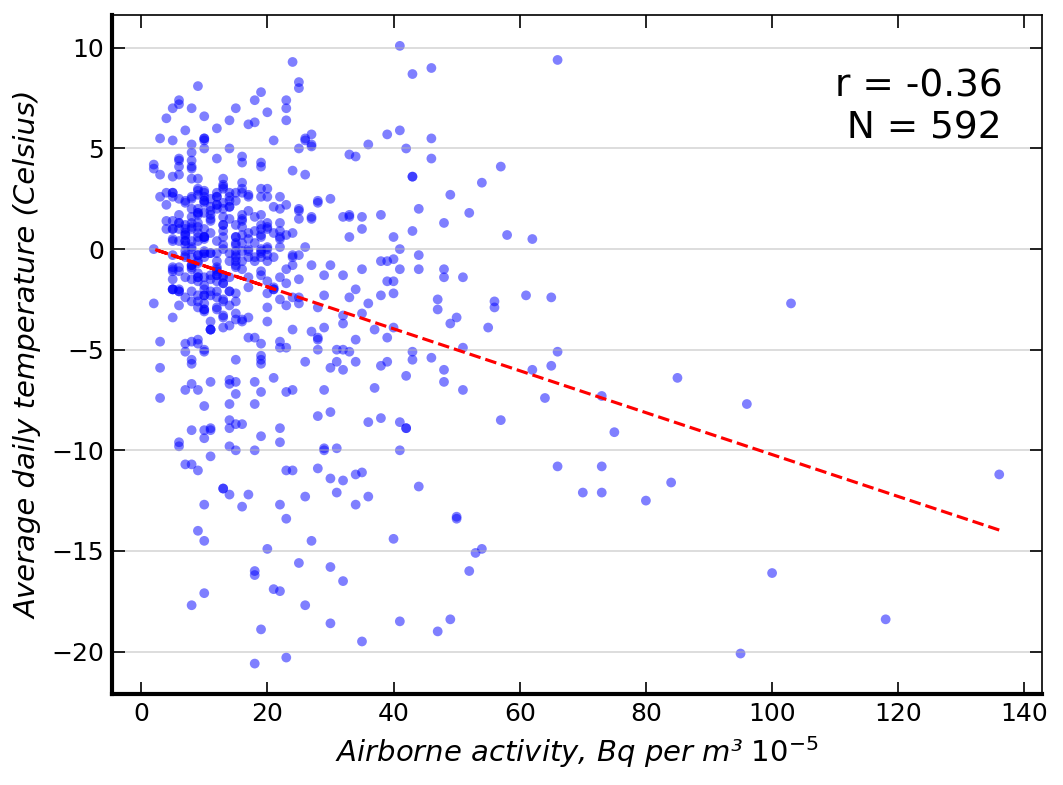

<Figure size 432x288 with 0 Axes>

In [22]:
ox1 = df['Conc']
oy1 = df['Temp']
s = chr(0x00b3)
s1 = ' $10^{-5}$'

fig, ax = plt.subplots(figsize = (8, 6), dpi =150)

plt.scatter(ox1, oy1, marker = 'o',
            facecolor = 'blue',
            edgecolors='None',
            alpha=0.5,
            s= 22)
z = np.polyfit(ox1, oy1, 1)
p = np.poly1d(z)
ax.tick_params(axis='both', 
               direction='in',
               labelsize = 12,
               length = 6,
               top = True,
               right = True)
ax.set_xlabel('Airborne activity, Bq per m'+s + s1,
               fontsize = 14,
               fontstyle='oblique',
               fontweight = 'medium')
ax.set_ylabel('Average daily temperature (Celsius)',
               fontsize = 14,
               fontstyle='oblique',
               fontweight = 'medium')
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
plt.grid(axis = 'y', alpha =0.5)
ax.plot(ox, p(ox),'r--')
plt.text(110, 5.5, 'r = %.2f \n N = 592' % corr, fontsize = 18, ha="left")
plt.show()
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Data for JER/fig7b.png')

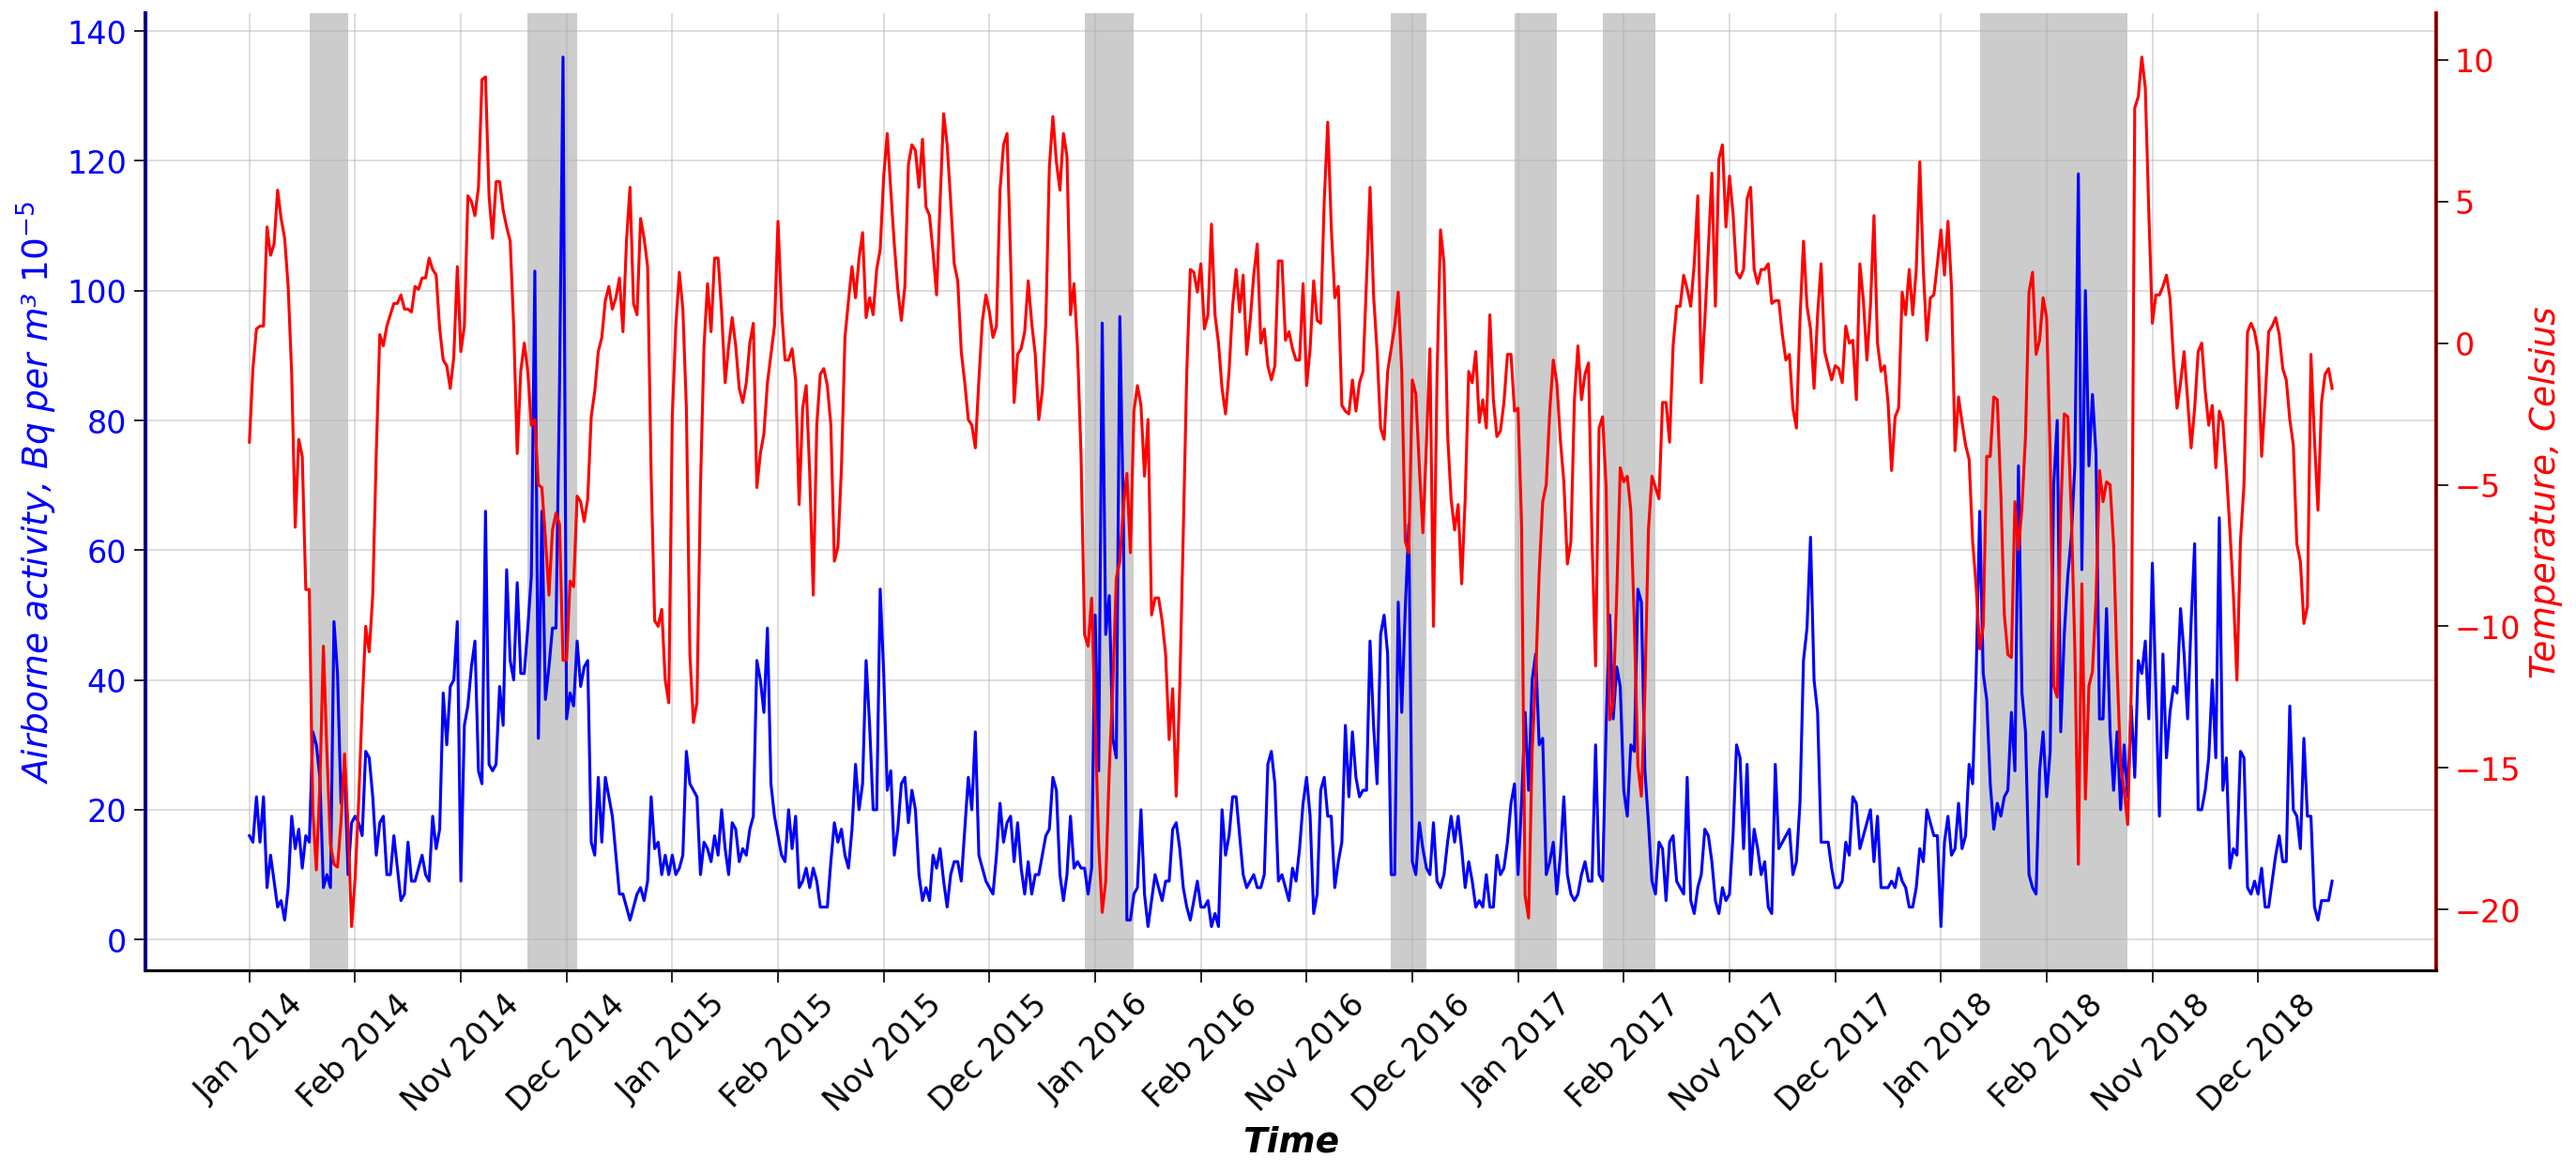

In [66]:
x1 = df['Index']
y1 = df['Temp']
y2 = df['Conc']

fig, ax1 = plt.subplots(1,1, figsize = (21, 9), dpi = 150)
ax1.plot(x1, y2, color = 'blue')

ax2 = ax1.twinx()
ax2.plot(x1, y1, color = 'red')
lbl = ['Jan 2014','Feb 2014','Nov 2014','Dec 2014','Jan 2015','Feb 2015','Nov 2015','Dec 2015','Jan 2016','Feb 2016','Nov 2016','Dec 2016','Jan 2017','Feb 2017','Nov 2017','Dec 2017','Jan 2018','Feb 2018','Nov 2018','Dec 2018']
plt.xticks(range(1,591, 30), lbl, size ='medium')

ax1.set_xlabel('Time',
               fontsize = 18,
               fontstyle='oblique',              
               fontweight = 'bold')
ax1.tick_params(axis='x', 
               direction='out',
               labelsize = 16,                
               rotation = 45,
               length = 6)
ax1.set_ylabel('Airborne activity, Bq per m'+s + s1,
               fontsize = 18,
               fontstyle='oblique',
               fontweight = 'medium',
               color='blue')
ax1.tick_params(axis='y', 
                direction='out',
                labelsize = 16,
                length = 6,
                labelcolor='blue' )
ax1.axvspan(80,94, facecolor = 'grey', alpha=0.4)
ax1.axvspan(18,29, facecolor = 'grey', alpha=0.4)
ax1.axvspan(238,252, facecolor = 'grey', alpha=0.4)
ax1.axvspan(325,335, facecolor = 'grey', alpha=0.4)
ax1.axvspan(360,372, facecolor = 'grey', alpha=0.4)
ax1.axvspan(385,400, facecolor = 'grey', alpha=0.4)
ax1.axvspan(492,534, facecolor = 'grey', alpha=0.4)
ax1.grid(alpha = .5)

ax2.set_ylabel('Temperature, Celsius',
               fontsize = 18,
               fontstyle='oblique',
               fontweight = 'medium',
               color='red')
ax2.tick_params(axis='y', 
                direction='out',
                labelsize = 16,
                length = 6,
                labelcolor='red' )
ax1.spines['bottom'].set_linewidth(1.5)
ax1.spines['right'].set_linewidth(2)
ax1.spines['right'].set_color('red')
ax1.spines['left'].set_linewidth(2)
ax1.spines['left'].set_color('blue')
ax1.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)
plt.show()
#plt.savefig('/content/drive/MyDrive/Colab Notebooks/Data for JER/fig7a.png', dpi = 80)

In [ ]:
df['Date_str']=df['Date'].dt.strftime('%m/%d/%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 357 entries, 0 to 360
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      357 non-null    datetime64[ns]
 1   Conc      357 non-null    int64         
 2   Temp      357 non-null    float64       
 3   Index     357 non-null    int64         
 4   Date_str  357 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 16.7+ KB


In [ ]:
df.Date_str.min()


'01/01/2014'

In [ ]:
df.Date_str.max()

'12/31/2016'